<a href="https://colab.research.google.com/github/varad8801/Ml-Projects/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def load_csv_from_github(github_link):

    raw_link = github_link.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/")

    return raw_link
df=pd.read_csv(load_csv_from_github("https://github.com/Kiranwaghmare123/PG-DBDA-Sep2023/blob/main/Dataset/Titanic.csv"))

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

##Dealing with the missing data

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
df[(df["Pclass"] == 3) & (df["Cabin"].isnull())].shape[0]


479

In [ ]:
df[(df["Pclass"] == 2) & (df["Cabin"].isnull())].shape[0]

168

In [ ]:
df.loc[(df["Pclass"] == 3) & (df["Cabin"].isnull()), "Cabin"] = "NoCabin"
df.loc[(df["Pclass"] == 2) & (df["Cabin"].isnull()), "Cabin"] = "NoCabin"

In [ ]:
df[(df["Pclass"] == 3) & (df["Cabin"].isnull())].shape[0]

0

In [ ]:
df[(df["Pclass"] == 2) & (df["Cabin"].isnull())].shape[0]

0

Here the value in cabin was null for pclass 3

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NoCabin,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NoCabin,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NoCabin,S


In [ ]:
df.set_index('PassengerId' ,inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NoCabin,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NoCabin,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NoCabin,S


<Axes: xlabel='Age'>

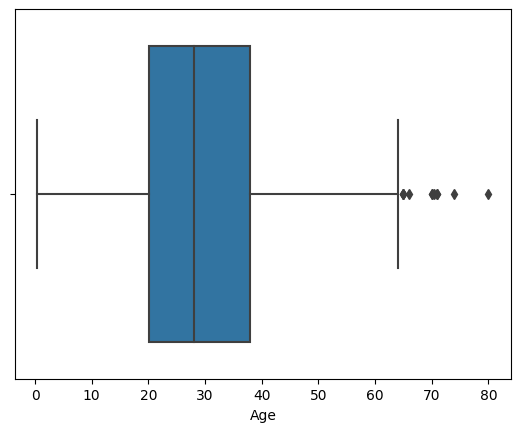

In [ ]:
sns.boxplot(x=df.Age)

As there are outliers

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="median")

df['Age']=imputer.fit_transform(df[['Age']])

In [ ]:
df['Age'].isnull().sum()

0

In [ ]:
imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
# df['Cabin']=imputer.fit_transform(df[['Cabin']])
df['Embarked']=imputer.fit_transform(df[['Embarked']])

In [ ]:
df['Cabin'].fillna("NoCabin",inplace=True)

In [ ]:
df_filterd=df.drop(df[['Ticket']],axis=1)

##Encoding the Categorical Data

In [ ]:
df_filterd.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NoCabin,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NoCabin,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NoCabin,S


In [ ]:
df_filterd.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
df_filterd.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_filterd['Embarked'] = LabelEncoder().fit_transform(df_filterd['Embarked'])


In [ ]:
df_filterd['Embarked'].unique()


array([2, 0, 1])

 'S'=2, 'C'=0, 'Q'=1

In [ ]:
df_filterd['Cabin'] = LabelEncoder().fit_transform(df_filterd['Cabin'])


In [ ]:
df_filterd['Cabin'].unique()

array([146,  81,  55, 129, 145,  49, 111,  13,  63,  41, 101,  23,  71,
        21,  80, 142, 140, 122,  12,  91,  98,  52,  36, 116, 138, 107,
        45, 141,  61, 123,  18,  14,  69, 144,   9,  28,  43,   8, 103,
        93,  87,  78, 102,  83,  40, 134,  46,  57,  89,  54, 113,   3,
        31,  90,  62,  51,  74, 125,  72,  35,  76, 124,  65,  17,  56,
        85, 127, 147,  59, 104,  24, 131,  79,  47, 115, 128,  10,  50,
        53,  86, 126,  97, 117, 133,   1,  25,  64,  96,  42, 121, 106,
        39,  88,  26,  27,  20,  82,  77,   2,  48,  75,   0, 135,  29,
         4,  95, 110, 114,   5,  33,   7, 108, 132,  58,  38,  34, 109,
        32,  19, 139,  73, 120,  84,  66, 137,  15, 105,  67, 100, 118,
        92, 136, 143,  22, 112,  44,  94,  11,  16,  37, 130,  68,  99,
       119,   6,  70,  30,  60])

In [ ]:


df_filterd['Cabin'] = df_filterd['Cabin'].apply(lambda x: 1 if x == 146 else 0)


In [ ]:
df_filterd.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,2


In [ ]:
from sklearn.preprocessing import LabelEncoder
df_filterd['Sex'] = LabelEncoder().fit_transform(df_filterd['Sex'])


In [ ]:
df_filterd.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,2


##Analysis

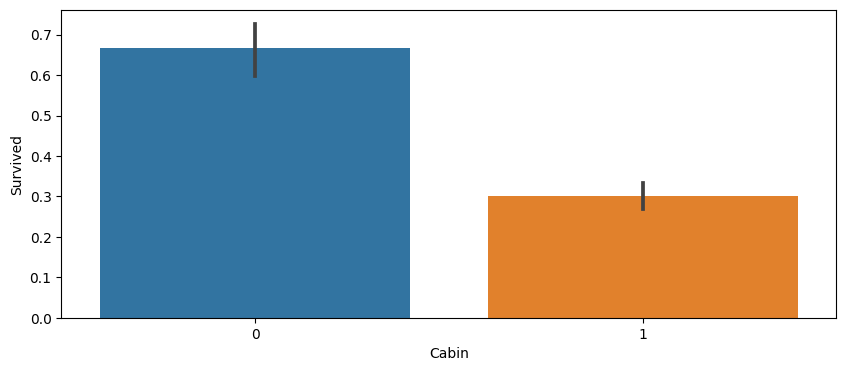

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x="Cabin",y="Survived",data=df_filterd)
plt.xlabel("Cabin")
plt.ylabel("Survived")
plt.show()


Here we see that people with out cabin survived more than those who have cabin

In [ ]:
df_filterd

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,2
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,1,2
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,0,2
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,23.4500,1,2


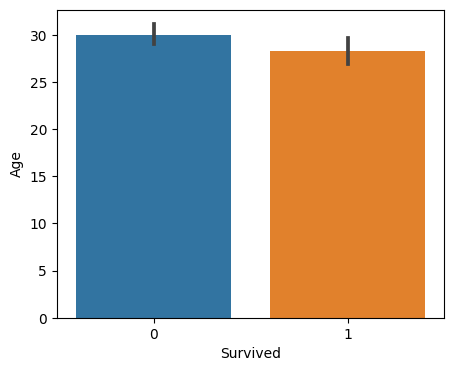

In [ ]:
plt.figure(figsize=(5,4))
sns.barplot(x="Survived",y="Age",data=df_filterd)
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()


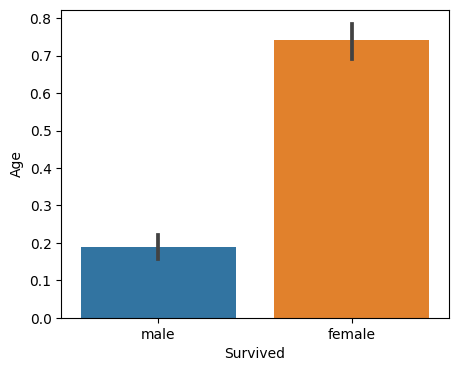

In [ ]:
plt.figure(figsize=(5,4))
sns.barplot(y="Survived",x="Sex",data=df)
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()


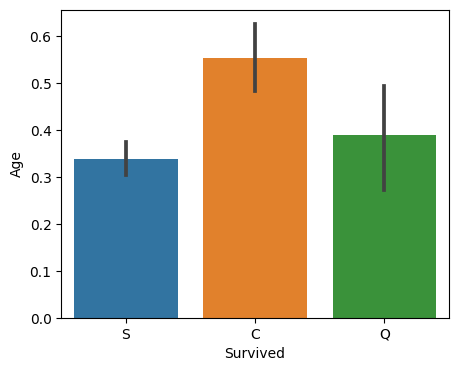

In [ ]:
plt.figure(figsize=(5,4))
sns.barplot(y="Survived",x="Embarked",data=df)
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()


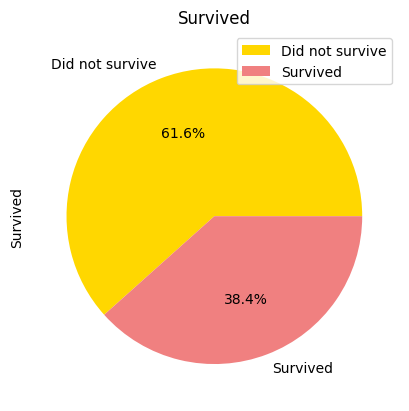

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame
colors = ['gold', 'lightcoral']  # Specify the colors for each category

# Plot the pie chart with labels
df_filterd['Survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, labels=['Did not survive', 'Survived'])
plt.title('Survived')

# Add a legend
plt.legend()

plt.show()


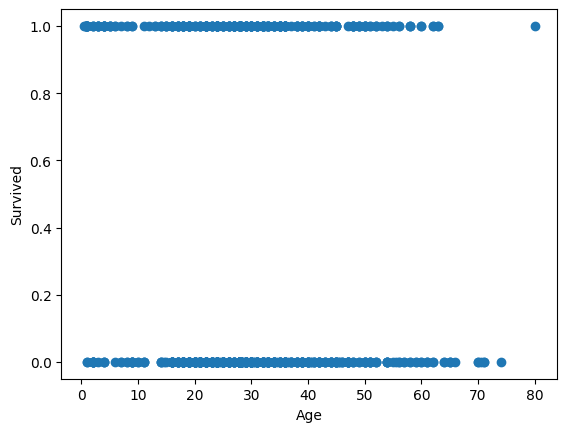

In [ ]:
# prompt: plot a subplot of scatterplots vs survived and plot a regression line

import matplotlib.pyplot as plt
plt.scatter(df_filterd['Age'], df_filterd['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()


In [ ]:
Y=df_filterd.iloc[:,0].values
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
df_filterd.drop('Name', axis=1, inplace=True)

In [ ]:
df_filterd.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.316912,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.725541,0.162098
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.140391,0.108262
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.240314,-0.018754
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.040460,0.068230
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.036987,0.039798
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.482075,-0.224719
Cabin,-0.316912,0.725541,0.140391,-0.240314,0.040460,-0.036987,-0.482075,1.000000,0.160196
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,0.160196,1.000000


<Axes: >

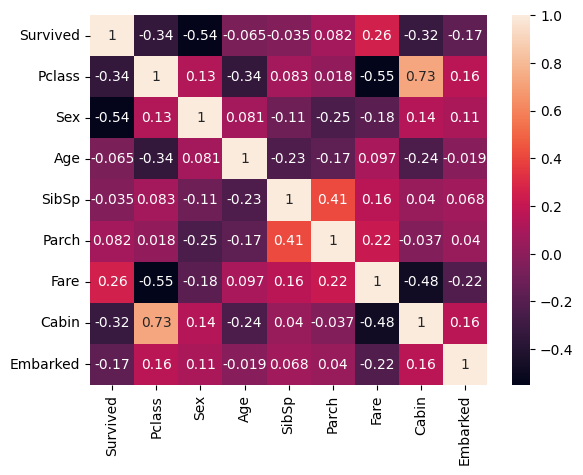

In [ ]:
sns.heatmap(df_filterd.corr(),annot=True)

In [ ]:
X=df_filterd.iloc[:,1:].values
X

array([[ 3.    ,  1.    , 22.    , ...,  7.25  ,  1.    ,  2.    ],
       [ 1.    ,  0.    , 38.    , ..., 71.2833,  0.    ,  0.    ],
       [ 3.    ,  0.    , 26.    , ...,  7.925 ,  1.    ,  2.    ],
       ...,
       [ 3.    ,  0.    , 28.    , ..., 23.45  ,  1.    ,  2.    ],
       [ 1.    ,  1.    , 26.    , ..., 30.    ,  0.    ,  0.    ],
       [ 3.    ,  1.    , 32.    , ...,  7.75  ,  1.    ,  1.    ]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=1/4, random_state=0)

In [ ]:
x_train

array([[ 3.    ,  1.    , 28.    , ...,  7.8958,  1.    ,  2.    ],
       [ 3.    ,  0.    , 17.    , ...,  7.925 ,  1.    ,  2.    ],
       [ 3.    ,  1.    , 30.    , ..., 16.1   ,  1.    ,  2.    ],
       ...,
       [ 3.    ,  1.    , 28.    , ...,  7.7333,  1.    ,  1.    ],
       [ 3.    ,  0.    , 36.    , ..., 17.4   ,  1.    ,  2.    ],
       [ 2.    ,  1.    , 60.    , ..., 39.    ,  1.    ,  2.    ]])

In [ ]:
x_test

array([[  3.    ,   1.    ,  28.    , ...,  14.4583,   1.    ,   0.    ],
       [  3.    ,   1.    ,  28.    , ...,   7.55  ,   1.    ,   2.    ],
       [  3.    ,   1.    ,   7.    , ...,  29.125 ,   1.    ,   1.    ],
       ...,
       [  3.    ,   1.    ,  19.    , ...,   7.775 ,   1.    ,   2.    ],
       [  1.    ,   0.    ,  21.    , ..., 262.375 ,   0.    ,   0.    ],
       [  3.    ,   0.    ,   4.    , ...,  16.7   ,   0.    ,   2.    ]])

In [ ]:
y_train

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [ ]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1])

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

In [ ]:
x_train

array([[ 0.83012938,  0.72705166, -0.11727262, ..., -0.48380773,
         0.55429298,  0.5674794 ],
       [ 0.83012938, -1.37541808, -0.96500423, ..., -0.48323058,
         0.55429298,  0.5674794 ],
       [ 0.83012938,  0.72705166,  0.0368604 , ..., -0.32165051,
         0.55429298,  0.5674794 ],
       ...,
       [ 0.83012938,  0.72705166, -0.11727262, ..., -0.48701956,
         0.55429298, -0.7307269 ],
       [ 0.83012938, -1.37541808,  0.49925946, ..., -0.29595582,
         0.55429298,  0.5674794 ],
       [-0.36497068,  0.72705166,  2.34885571, ...,  0.13097136,
         0.55429298,  0.5674794 ]])

In [ ]:
y_train

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [ ]:
x_test

array([[ 0.81917196,  0.76997217, -0.06727313, ..., -0.36857787,
         0.51676441, -1.72409547],
       [ 0.81917196,  0.76997217, -0.06727313, ..., -0.51628544,
         0.51676441,  0.64189401],
       [ 0.81917196,  0.76997217, -1.66914472, ..., -0.05498659,
         0.51676441, -0.54110073],
       ...,
       [ 0.81917196,  0.76997217, -0.75378953, ..., -0.51147467,
         0.51676441,  0.64189401],
       [-1.58445102, -1.29874824, -0.60123033, ...,  4.93217242,
        -1.93511779, -1.72409547],
       [ 0.81917196, -1.29874824, -1.89798352, ..., -0.32064769,
        -1.93511779,  0.64189401]])

In [ ]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1])

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred=model.predict(x_test)
pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1])